In [261]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
df = pd.read_csv("C:/Users/RSB - Thangaraj/Documents/Python Projects/Reliance.csv")

In [263]:
df.head()

,Date,Open,High,Low,Close
0,2021-04-01,1995.1,1998.9,1968.00,1990.85
1,2021-05-01,1969.0,1983.6,1956.00,1966.10
2,2021-06-01,1965.9,1966.0,1905.15,1914.25
3,2021-07-01,1920.5,1945.0,1905.15,1911.15
4,2021-08-01,1918.0,1938.4,1912.10,1933.70


In [264]:
df.ta.ema(close='Close',length=10,append=True)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
150    2095.667974
151    2104.755615
152    2117.254594
153    2125.799213
154    2134.317538
Name: EMA_10, Length: 155, dtype: float64

In [265]:
df.head()

,Date,Open,High,Low,Close,EMA_10
0,2021-04-01,1995.1,1998.9,1968.00,1990.85,NaN
1,2021-05-01,1969.0,1983.6,1956.00,1966.10,NaN
2,2021-06-01,1965.9,1966.0,1905.15,1914.25,NaN
3,2021-07-01,1920.5,1945.0,1905.15,1911.15,NaN
4,2021-08-01,1918.0,1938.4,1912.10,1933.70,NaN


In [266]:
df1 = df.iloc[11:]
df1

,Date,Open,High,Low,Close,EMA_10
11,1/19/2021 15:30:00,1994.65,2031.00,1994.65,2016.40,1960.910909
12,1/20/2021 15:30:00,2021.40,2058.00,2001.40,2054.70,1977.963471
13,1/21/2021 15:30:00,2082.00,2120.00,2075.00,2099.40,2000.042840
14,1/22/2021 15:30:00,2111.00,2115.35,2035.15,2049.60,2009.053233
15,1/25/2021 15:30:00,2034.95,2034.95,1932.00,1941.00,1996.679918
...,...,...,...,...,...,...
150,2021-12-08,2124.90,2126.20,2105.00,2110.50,2095.667974
151,8/13/2021 15:30:00,2117.30,2149.90,2108.95,2145.65,2104.755615
152,8/16/2021 15:30:00,2149.35,2203.00,2128.15,2173.50,2117.254594
153,8/17/2021 15:30:00,2168.85,2185.20,2147.85,2164.25,2125.799213


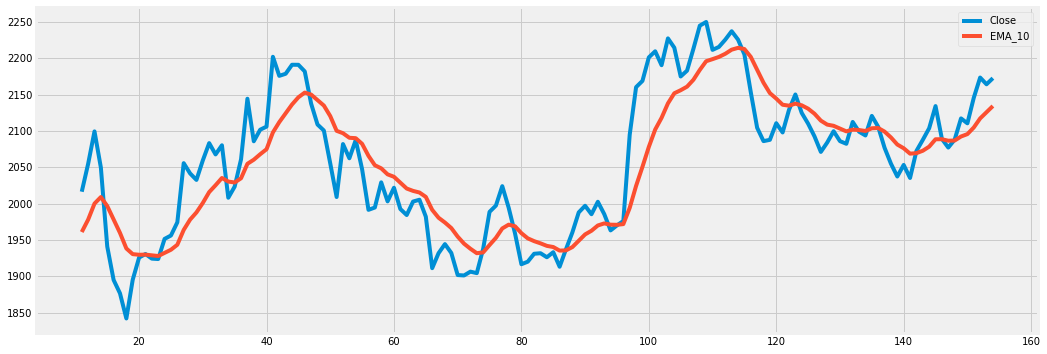

In [267]:
df1[['Close','EMA_10']].plot(figsize=(16,6))

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [298]:
X = df1['Close'].values
y = df1['EMA_10'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=0)

In [299]:
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [300]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(28, 1)
(116,)
(28, 1)
(116,)


In [301]:
X_test=X_test.reshape(-1,1)
y_pred = model.predict(X_test)

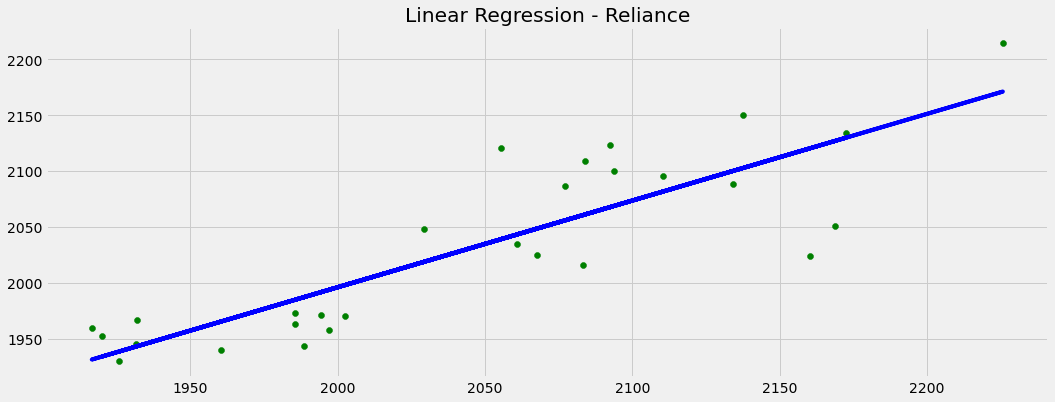

In [302]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
plt.scatter(X_train,y_train,color="green")
plt.plot(X_train,model.predict(X_train),color="blue")
plt.title("Linear Regression - Reliance")
plt.show()

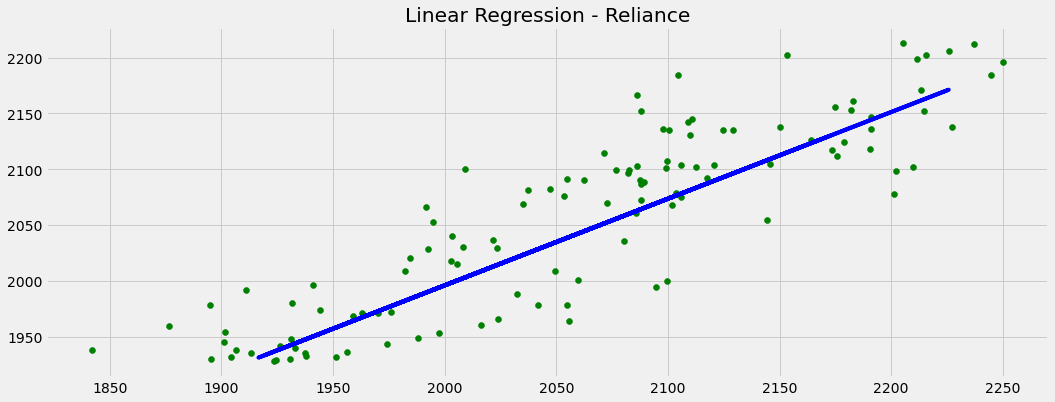

In [303]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,6))
plt.scatter(X_test,y_test,color="green")
plt.plot(X_train,model.predict(X_train),color="blue")
plt.title("Linear Regression - Reliance")
plt.show()

In [304]:
## Predicted metric values
X_test=X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [305]:
df12 = pd.DataFrame(y_test,columns=["Actual"])

In [306]:
df13 = pd.DataFrame(y_pred,columns=["Predicted"])

In [307]:
frames = [df12,df13]

In [346]:
plot_df = pd.concat(frames,axis=1)
plot_df

,Actual,Predicted
0,1938.300872,1873.333907
1,2078.034402,2152.161933
2,2183.997095,2186.035697
3,2054.801490,2108.005755
4,2136.081582,2071.997905
...,...,...
111,2000.914496,2042.159504
112,2074.859869,2078.244957
113,2036.941160,2012.941928
114,2068.780156,2023.379548


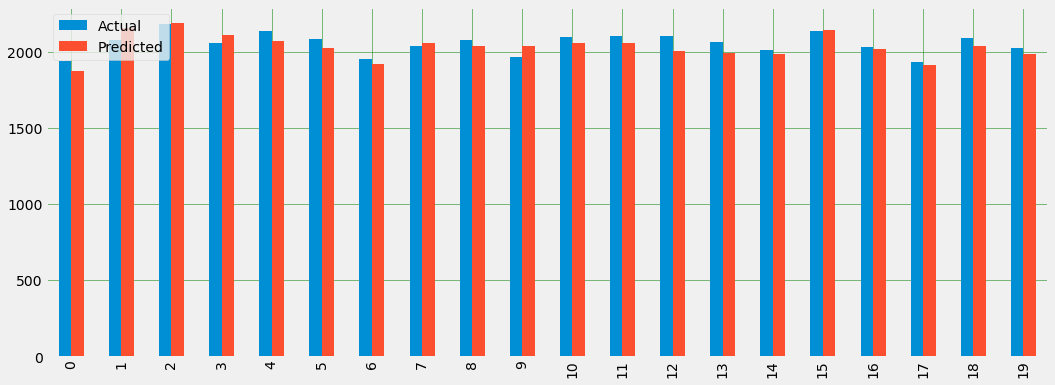

In [309]:
plot_df.head(20).plot(kind='bar',figsize=(16,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

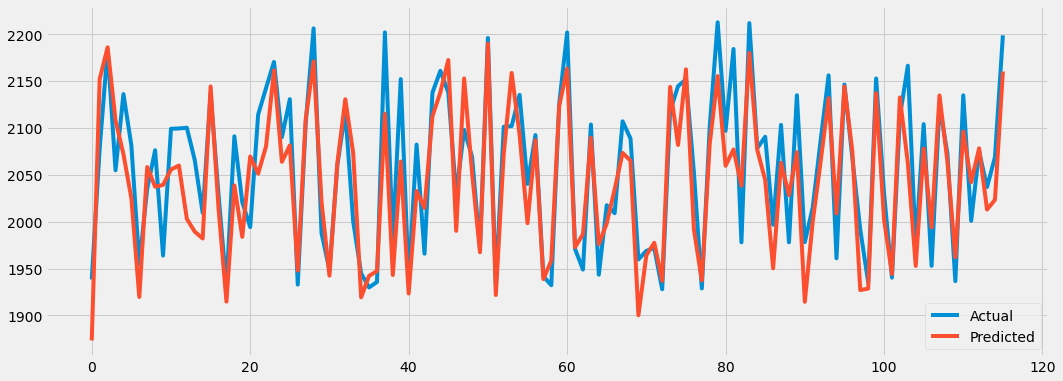

In [310]:
plot_df[["Actual","Predicted"]].plot(figsize=(16,6))

In [343]:
data = {
        "Coefficient" : model.coef_,
        "Regression Score" : model.score(X_test,y_test),
        "Mean Absolute Error" : mean_absolute_error(y_test,y_pred),
        "Mean Squared Error" : mean_squared_error(y_test,y_pred),
        "Accuracy of the model" : r2_score(y_test,y_pred)*100
       }
result = pd.DataFrame([data])
result

,Coefficient,Regression Score,Mean Absolute Error,Mean Squared Error,Accuracy of the model
0,[[0.7760312452458727]],0.746275,33.989685,1754.965425,74.627475
